In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA

In [2]:
data_path = "../data/"
X_train = pd.read_csv(os.path.join(data_path, "X_train.csv"))
X_test = pd.read_csv(os.path.join(data_path, "X_test.csv"))
y_train = pd.read_csv(os.path.join(data_path, "y_train.csv"))
y_test = pd.read_csv(os.path.join(data_path, "y_test.csv"))

In [3]:
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')

Shape of X_train: (237, 20)
Shape of X_test: (60, 20)


# 1. Apply PCA to reduce feature dimensionality while maintaining variance.
**Steps:**

* Fit PCA on training data.
* Transform both training and test data into new features (principal components).
* Save transformed data into new DataFrames with clear PC column names.

In [4]:
# PCA components -> none mean keeping all components
pca = PCA(n_components=None)

pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [5]:
X_train_df = pd.DataFrame(X_train_pca, columns=[f'PC{i+1}' for i in range(X_train_pca.shape[1])])
X_test_df = pd.DataFrame(X_test_pca, columns=[f'PC{i+1}' for i in range(X_test_pca.shape[1])])

X_train_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,1.581413,-0.118115,0.526243,0.329584,-0.892316,-1.409958,0.012405,-0.041447,0.865719,-0.027919,-0.008338,-0.011015,-0.096202,-0.074733,0.045274,-0.035837,0.094073,0.136166,0.021678,-0.018273
1,0.275094,1.137663,0.984250,-0.258152,0.652191,-0.171674,-0.283191,-0.779139,0.190622,-0.049715,0.299429,-0.167772,-0.220054,0.009387,-0.091867,0.040739,-0.142811,-0.071722,-0.497229,-0.038079
2,-0.956060,0.484582,0.577163,-0.628427,1.362815,-0.183272,-0.408920,-0.975655,0.025793,-0.062027,-0.040025,0.162911,-0.300052,0.031326,0.623286,0.311646,0.024013,0.047717,-0.472318,-0.034023
3,-0.068936,0.307044,-0.869860,0.272243,0.974685,-0.071530,-0.440385,0.452494,-0.355501,-0.955516,0.241139,0.186576,0.308581,0.472440,-0.111545,-0.037249,-0.163365,0.015673,0.174255,-0.017647
4,1.926561,0.673543,0.107081,0.140135,0.227936,-0.331336,0.489502,-0.155414,0.124117,0.302765,-0.084141,-0.333127,0.391474,0.165715,0.170893,0.067786,-0.054219,0.000225,0.051526,-0.013862


In [6]:
X_test_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,1.604774,-1.739733,0.216146,-0.609433,-0.397599,-0.854747,-0.517807,-0.375322,0.287307,-0.880930,0.245206,0.562834,-0.361006,0.161413,-0.233454,-0.027958,0.091639,0.107831,0.062252,-0.005333
1,1.342689,-0.567435,-0.492464,-0.631577,-0.010446,0.629718,0.053308,-0.408525,-0.087330,0.094834,0.487939,-0.429393,0.435573,-0.643219,0.194939,0.189164,-0.061257,0.085518,0.004187,-0.008776
2,1.028949,1.589942,-0.371566,-0.404579,0.267481,-0.749195,0.274257,-0.368631,0.192017,0.621251,-0.245154,0.393884,0.080136,-0.460087,-0.221527,-0.058715,-0.169989,-0.127595,0.027025,-0.025179
3,-2.724093,0.086387,-1.238405,-0.479359,0.318933,-0.291698,-0.445764,0.143499,-0.475860,-0.384825,-0.473765,-0.699996,0.532233,0.037868,-0.437306,0.502950,0.020810,0.221639,0.043265,-0.105637
4,1.296994,0.204869,-0.063688,-0.152933,1.075930,0.300760,0.002720,-0.552792,-0.432665,-0.576091,0.344940,0.154606,0.241742,0.392875,-0.115815,0.115247,-0.111927,-0.075776,0.122079,-0.027771


**Results:**

* Training and test sets successfully reduced into principal components.
* Each new feature (PC1, PC2, …) is a combination of original features.
* Data is now ready for variance analysis.

---

# 2. Determine the optimal number of principal components using the explained variance ratio.
**Steps:**

* Print variance explained by each principal component.
* Calculate cumulative explained variance to see how much information is kept.
* Identify the number of components needed to reach 95% (or 90%) variance.

In [7]:
import numpy as np

In [8]:
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio for each Principal Component:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {ratio:.4f}")

Explained Variance Ratio for each Principal Component:
PC1: 0.2688
PC2: 0.1538
PC3: 0.1217
PC4: 0.1107
PC5: 0.0693
PC6: 0.0499
PC7: 0.0358
PC8: 0.0333
PC9: 0.0272
PC10: 0.0237
PC11: 0.0223
PC12: 0.0178
PC13: 0.0171
PC14: 0.0151
PC15: 0.0121
PC16: 0.0068
PC17: 0.0057
PC18: 0.0045
PC19: 0.0029
PC20: 0.0015


In [9]:
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
print("Cumulative Explained Variance:")
for i, cum_ratio in enumerate(cumulative_explained_variance):
    print(f"Up to PC{i+1}: {cum_ratio:.4f}")

Cumulative Explained Variance:
Up to PC1: 0.2688
Up to PC2: 0.4226
Up to PC3: 0.5443
Up to PC4: 0.6550
Up to PC5: 0.7242
Up to PC6: 0.7742
Up to PC7: 0.8099
Up to PC8: 0.8432
Up to PC9: 0.8704
Up to PC10: 0.8941
Up to PC11: 0.9165
Up to PC12: 0.9343
Up to PC13: 0.9514
Up to PC14: 0.9665
Up to PC15: 0.9786
Up to PC16: 0.9854
Up to PC17: 0.9911
Up to PC18: 0.9957
Up to PC19: 0.9985
Up to PC20: 1.0000


In [10]:
n_components_95 = np.argmax(cumulative_explained_variance  >= 0.95) + 1
print(f"Optimal number of components to explain 95% variance: {n_components_95}")

Optimal number of components to explain 95% variance: 13


**Results:**

* Each PC contributes differently to total variance.
* Cumulative variance shows how many PCs are required to retain enough information.
* Found the smallest number of PCs that explain at least 95% of variance.

---

# 3. Visualize PCA results using a scatter plot and cumulative variance plot
**Steps:**

* Plot explained variance ratio per PC.
* Plot cumulative explained variance curve with threshold lines (90% and 95%).
* Reduce data into 2 components (PC1, PC2) for visualization.
* Create scatter plot of samples colored by target variable.

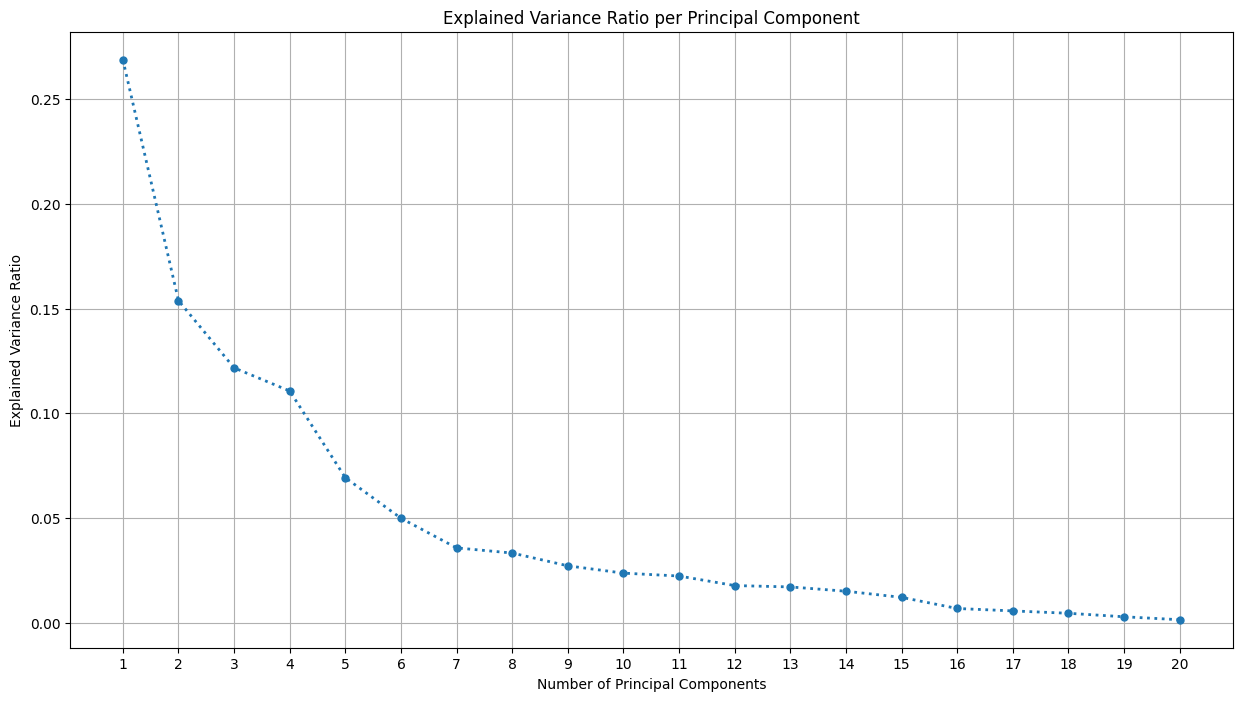

In [11]:
plt.figure(figsize=(15, 8))
plt.plot(range(1, len(explained_variance_ratio) + 1), 
         explained_variance_ratio, 
         marker='.', markersize=10, 
         linestyle='dotted', linewidth=2)
plt.title('Explained Variance Ratio per Principal Component')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.show()

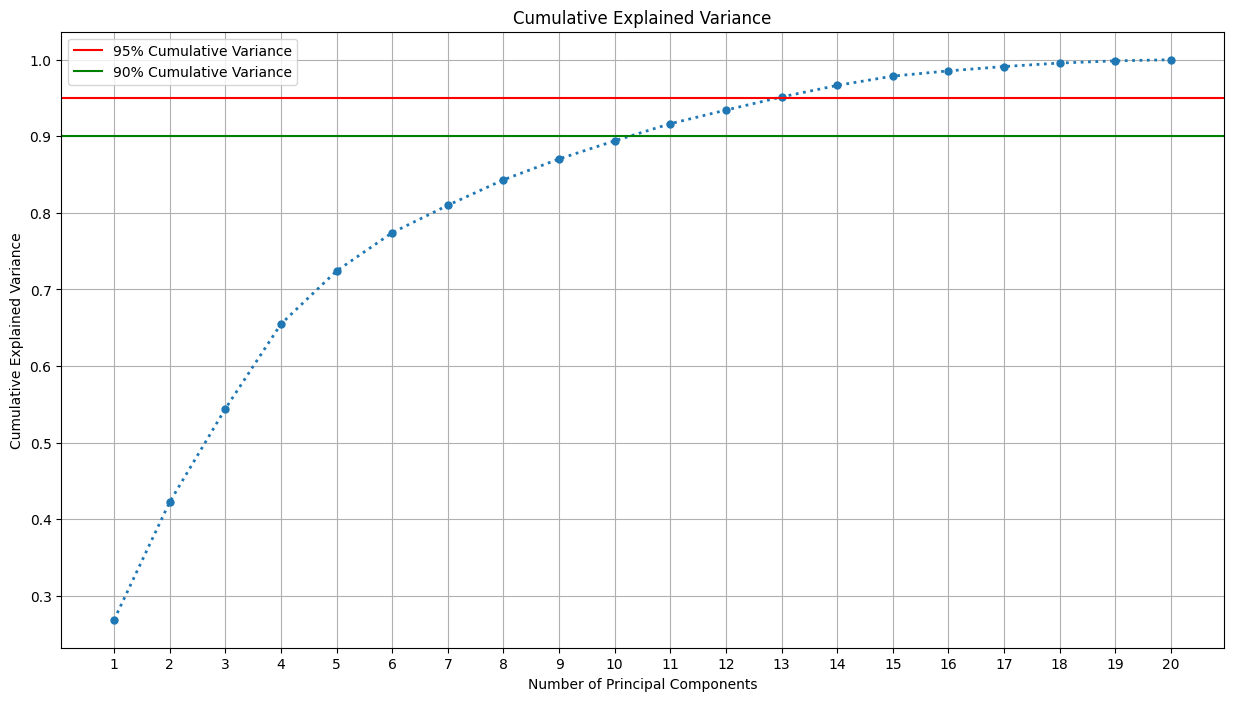

In [12]:
plt.figure(figsize=(15, 8))
plt.plot(range(1, len(cumulative_explained_variance) + 1), 
         cumulative_explained_variance, 
         marker='.', markersize=10, 
         linestyle='dotted', linewidth=2)
plt.axhline(y=0.95, color='r', linestyle='-', label='95% Cumulative Variance')
plt.axhline(y=0.90, color='g', linestyle='-', label='90% Cumulative Variance')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.xticks(range(1, len(cumulative_explained_variance) + 1))
plt.legend()
plt.show()

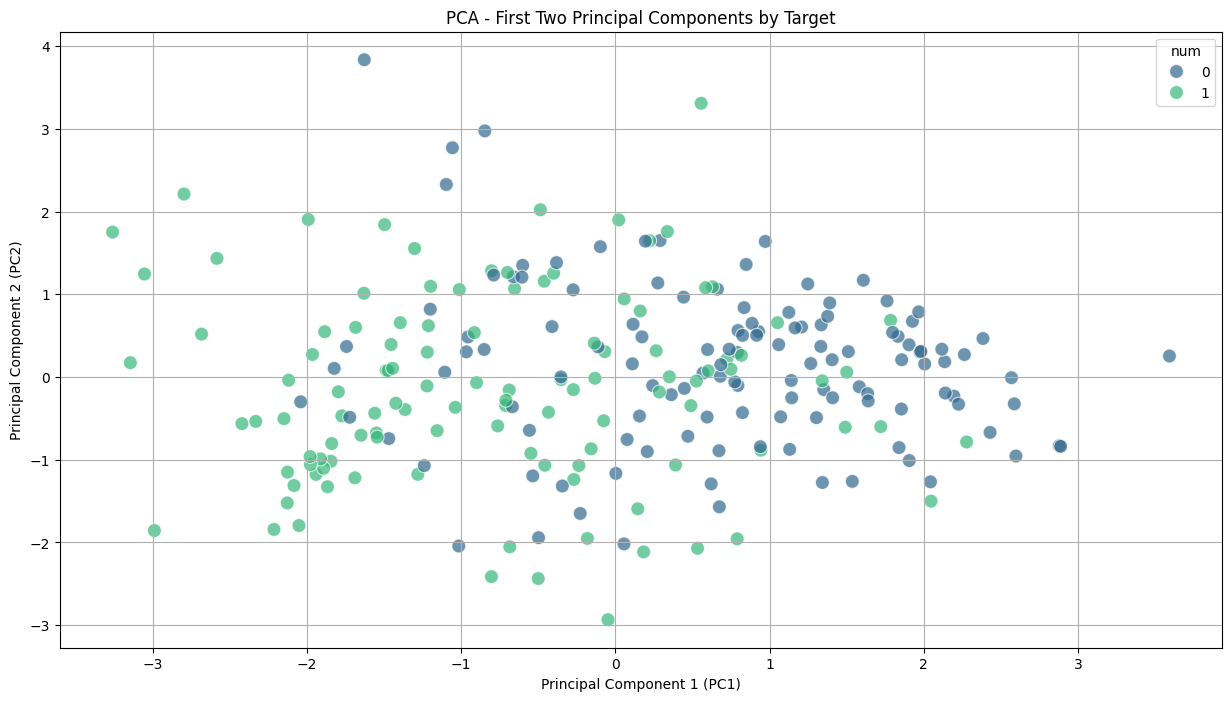

In [13]:
X_pca_2d = PCA(n_components=2).fit_transform(X_train)
X_pca_df = pd.DataFrame(X_pca_2d, columns=['PC1', 'PC2'])
df_plot = pd.concat([X_pca_df, y_train.reset_index(drop=True)], axis=1)

plt.figure(figsize=(15, 8))
sns.scatterplot(x='PC1', y='PC2', hue='num', data=df_plot, palette='viridis', s=100, alpha=0.7)
plt.title('PCA - First Two Principal Components by Target')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.grid(True)
plt.show()

**Results:**

* Variance plots clearly show the contribution of each PC.
* The cumulative curve confirms the optimal number of PCs chosen.
* Scatter plot reveals class separation in lower-dimensional space.
* PCA helps visualize data structure and separability.

In [14]:
optimal_components = n_components_95 
pca = PCA(n_components=optimal_components) # 13
X_train = pd.DataFrame(pca.fit_transform(X_train))
X_test = pd.DataFrame(pca.transform(X_test))

In [15]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.581413,-0.118115,0.526243,0.329584,-0.892316,-1.409958,0.012405,-0.041447,0.865719,-0.027919,-0.008338,-0.011015,-0.096202
1,0.275094,1.137663,0.984250,-0.258152,0.652191,-0.171674,-0.283191,-0.779139,0.190622,-0.049715,0.299429,-0.167772,-0.220054
2,-0.956060,0.484582,0.577163,-0.628427,1.362815,-0.183272,-0.408920,-0.975655,0.025793,-0.062027,-0.040025,0.162911,-0.300052
3,-0.068936,0.307044,-0.869860,0.272243,0.974685,-0.071530,-0.440385,0.452494,-0.355501,-0.955516,0.241139,0.186576,0.308581
4,1.926561,0.673543,0.107081,0.140135,0.227936,-0.331336,0.489502,-0.155414,0.124117,0.302765,-0.084141,-0.333127,0.391474


In [16]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.604774,-1.739733,0.216146,-0.609433,-0.397599,-0.854747,-0.517807,-0.375322,0.287307,-0.880930,0.245206,0.562834,-0.361006
1,1.342689,-0.567435,-0.492464,-0.631577,-0.010446,0.629718,0.053308,-0.408525,-0.087330,0.094834,0.487939,-0.429393,0.435573
2,1.028949,1.589942,-0.371566,-0.404579,0.267481,-0.749195,0.274257,-0.368631,0.192017,0.621251,-0.245154,0.393884,0.080136
3,-2.724093,0.086387,-1.238405,-0.479359,0.318933,-0.291698,-0.445764,0.143499,-0.475860,-0.384825,-0.473765,-0.699996,0.532233
4,1.296994,0.204869,-0.063688,-0.152933,1.075930,0.300760,0.002720,-0.552792,-0.432665,-0.576091,0.344940,0.154606,0.241742


In [17]:
import os
output_dir = "../data/"
os.makedirs(output_dir, exist_ok=True)

X_train.to_csv(os.path.join(output_dir, "X_train.csv"), index=False)
X_test.to_csv(os.path.join(output_dir, "X_test.csv"), index=False)